In [37]:
import pandas as pd
from sklearn import tree
import numpy as np

In [7]:
df =  pd.read_excel('../data/dates.xlsx')
df

,humor,conversa,confiança,gostos,resultado
0,7,5,8,6,date ruim
1,2,9,6,3,sem date
2,8,7,9,9,date ruim
3,10,8,5,7,date ótimo
4,1,4,4,10,sem date
5,6,8,5,7,sem date
6,8,6,10,3,date ótimo
7,7,8,10,10,date ruim
8,10,9,7,10,date ruim
9,5,6,10,7,date ruim


In [9]:
df.groupby(df['resultado']).mean()

,humor,conversa,confiança,gostos
resultado,,,,
date ruim,7.40,7.00,8.8,8.40
date ótimo,9.00,7.00,7.5,5.00
sem date,4.75,7.25,5.0,6.75


In [14]:
round(df['resultado'].value_counts(normalize=True) *100)

resultado
date ruim     45.0
sem date      36.0
date ótimo    18.0
Name: proportion, dtype: float64

In [16]:
features = ['humor',
            'conversa',
            'confiança',
            'gostos']

target = ['resultado']

x = df[features]
y = df[target]

In [34]:
arvore = tree.DecisionTreeClassifier(max_depth=2)
arvore.fit(x,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'confiança <= 6.5\ngini = 0.628\nsamples = 11\nvalue = [5, 2, 4]\nclass = date ruim'),
 Text(0.25, 0.5, 'humor <= 8.0\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = sem date'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = sem date'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = date ótimo'),
 Text(0.75, 0.5, 'gostos <= 4.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]\nclass = date ruim'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = date ótimo'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]\nclass = date ruim')]

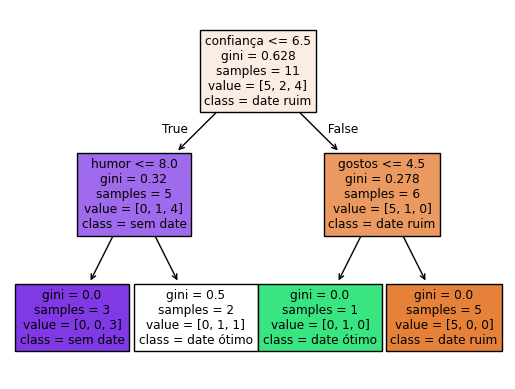

In [35]:
tree.plot_tree(arvore,
               class_names= arvore.classes_,
               feature_names= features,
               filled=True)

In [40]:
#Entrada de novo 

nova_date = ([[8,10,7,5]])
nova_date

[[8, 10, 7, 5]]

In [36]:
prob_date = arvore.predict_proba(nova_date)

pd.Series(prob_date[0], index=arvore.classes_)

c:\Users\ferre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


date ruim     1.0
date ótimo    0.0
sem date      0.0
dtype: float64

In [ ]:
#Entrada de novos dados de três pessoas diferentes. Relembrando a ordem das features: ['humor', 'conversa', 'confiança', 'gostos']


novos_dados = np.array([
     [10, 5, 7, 6], 
    [10, 9, 6, 5],  
    [7, 8, 3, 7]
])

novos_dados

array([[10,  5,  7,  6],
       [10,  9,  6,  5],
       [ 7,  8,  3,  7]])

In [ ]:
#Fazendo a previsão de probabilidades

prob_date = arvore.predict_proba(novos_dados)

c:\Users\ferre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Saída do modelo com a probabilidade do resutado do date (ou sem date) baseado nos dados treinados no modelo

resultados = pd.DataFrame(prob_date, columns=arvore.classes_, 
                          index = ['Pessoa 1', 'pessoa 2', 'pessoa 3'])
resultados

,date ruim,date ótimo,sem date
Pessoa 1,1.0,0.0,0.0
pessoa 2,0.0,0.5,0.5
pessoa 3,0.0,0.0,1.0


In [ ]:
['humor',
            'conversa',
            'confiança',
            'gostos']